<a href="https://colab.research.google.com/github/RhythmAhir/Image_Classifer_Colab/blob/main/Image_Classifer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import all libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import os
import shutil
import fnmatch

import plotly.express as px

import sys


In [ ]:
#read data from a file with path ('filename.csv')
col_names = ["Id", "gender", "masterCategory","subCategory","articleType","baseColour","season","year","usage","productDisplayName" ]
df= pd.read_csv('/content/drive/MyDrive/Data/styles.csv',names=col_names, skiprows=2)
df

In [ ]:
#Using the CSV File I find the unique Categories
df.masterCategory.unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

In [ ]:
#All Apparel list
Apparel = df.loc[df['masterCategory'] == 'Apparel']
Apparel

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
4,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
5,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
...,...,...,...,...,...,...,...,...,...,...
44435,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Striped Black Jersey
44436,13496,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Chimp Men Teja Main Hoon Blue Tshirts
44438,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,2011.0,Casual,Tantra Women Printed Peach T-shirt
44439,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top


In [ ]:
#All Accessories list
Accessories = df.loc[df['masterCategory'] == 'Accessories']
Accessories

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
7,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
8,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch
10,48123,Women,Accessories,Belts,Belts,Black,Summer,2012.0,Casual,Fossil Women Black Huarache Weave Belt
12,47957,Women,Accessories,Bags,Handbags,Blue,Summer,2012.0,Casual,Murcia Women Blue Handbag
...,...,...,...,...,...,...,...,...,...,...
44426,37431,Women,Accessories,Bags,Handbags,Black,Summer,2012.0,Casual,Murcia Women Black Handbag
44427,20486,Women,Accessories,Belts,Belts,Black,Winter,2015.0,Casual,Baggit Women Princy Gang Black Belt
44430,10213,Women,Accessories,Bags,Handbags,Black,Winter,2015.0,Casual,Murcia Women Hahk Black Handbags
44434,40563,Women,Accessories,Watches,Watches,White,Winter,2016.0,Casual,Titan Women White Dial Watch NB9701WM01


In [ ]:
#All Footwear list
Footwear = df.loc[df['masterCategory'] == 'Footwear']
Footwear

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
9,9204,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2011.0,Casual,Puma Men Future Cat Remix SF Black Casual Shoes
11,18653,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,2011.0,Casual,Fila Men Cush Flex Black Slippers
13,46885,Boys,Footwear,Flip Flops,Flip Flops,Navy Blue,Fall,2012.0,Casual,Ben 10 Boys Navy Blue Slippers
20,12967,Men,Footwear,Sandal,Sandals,Black,Fall,2011.0,Casual,ADIDAS Men Spry M Black Sandals
24,9036,Men,Footwear,Shoes,Formal Shoes,Black,Winter,2011.0,Formal,Buckaroo Men Flores Black Formal Shoes
...,...,...,...,...,...,...,...,...,...,...
44425,4336,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,Fila Men's Leonard White Black Shoe
44429,56406,Women,Footwear,Shoes,Flats,Maroon,Winter,2012.0,Casual,Rocia Women Maroon & Black Sandals
44432,33091,Women,Footwear,Shoes,Heels,Gold,Winter,2015.0,Casual,Catwalk Women Gold Flats
44440,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe


In [ ]:
#All Personal_Care list
Personal_Care = df.loc[df['masterCategory'] == 'Personal Care']
Personal_Care

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
23,18461,Men,Personal Care,Fragrance,Deodorant,White,Spring,2017.0,Casual,David Beckham Signature Men Deos
27,56019,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Soft Touch Show Stopper Copper Lipsti...
65,43993,Women,Personal Care,Fragrance,Perfume and Body Mist,Pink,Spring,2017.0,Casual,Police Women Passion Perfume
86,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
98,43967,Women,Personal Care,Fragrance,Perfume and Body Mist,Red,Spring,2017.0,Casual,DKNY Women Red Delicious Perfume
...,...,...,...,...,...,...,...,...,...,...
44356,32527,Men,Personal Care,Fragrance,Deodorant,Blue,Spring,2017.0,Casual,Tonino Lamborghini Men Forza Deo
44358,56062,Women,Personal Care,Lips,Lip Gloss,Pink,Spring,2017.0,Casual,Colorbar Extra Durable Gossip Lip Color 005
44417,56634,Women,Personal Care,Skin Care,Face Wash and Cleanser,Black,Spring,2017.0,Casual,Olay Women Total Effects 7 in 1 Foaming Cleanser
44437,55283,Women,Personal Care,Makeup,Highlighter and Blush,Pink,Spring,2017.0,Casual,Lakme Absolute Cheek Chromatic Day Blushes Blu...


In [ ]:
#All Free_Items list
Free_Items = df.loc[df['masterCategory'] == 'Free Items']
Free_Items

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
351,53598,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Sports,Q&Q Men Black Digital Watch
825,49696,Men,Free Items,Free Gifts,Ties,Blue,Summer,2012.0,Formal,Park Avenue Blue Patterned Tie
873,53591,Men,Free Items,Free Gifts,Free Gifts,White,Winter,2016.0,Casual,Q&Q Men White Dial Watch
1136,45894,Men,Free Items,Free Gifts,Free Gifts,Black,Winter,2016.0,Casual,Maxima Men Black Dial Watch
1359,53596,Men,Free Items,Free Gifts,Free Gifts,Navy Blue,Winter,2016.0,Casual,Q&Q Men Navy Blue Digital Watch
...,...,...,...,...,...,...,...,...,...,...
43342,54969,Men,Free Items,Free Gifts,Free Gifts,Black,Spring,2017.0,Casual,Rasasi Men Dynamic Energy Deo
43824,54967,Men,Free Items,Free Gifts,Free Gifts,Black,Spring,2017.0,Casual,Rasasi Men Olympic Flame Deo
44025,36346,Men,Free Items,Free Gifts,Free Gifts,Maroon,Summer,2012.0,Casual,Reid & Taylor Men Maroon Checked Tie
44324,51081,Women,Free Items,Free Gifts,Free Gifts,Yellow,Summer,2012.0,Ethnic,Satya Paul Yellow & Black Saree


In [ ]:
#All Sporting_Goods list
Sporting_Goods = df.loc[df['masterCategory'] == 'Sporting Goods']
Sporting_Goods

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
5051,13670,Unisex,Sporting Goods,Sports Equipment,Footballs,Gold,Fall,2011.0,Casual,Puma Unisex Liga XL Football
6064,2355,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,ADIDAS Red Bull Trophy Soccer Unisex Football
9252,2354,Unisex,Sporting Goods,Sports Equipment,Basketballs,Black,Winter,2010.0,Sports,ADIDAS Black Bounce Unisex Basketball
11372,4010,Unisex,Sporting Goods,Sports Equipment,Basketballs,Brown,Summer,2011.0,Sports,Spalding 150 SZ Brown Basketball
11923,1553,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,Puma Power Cat Hard Ground Football
14517,1552,Unisex,Sporting Goods,Sports Equipment,Footballs,White,Fall,2010.0,Sports,Puma Power Cat Trainer-WR Football
14655,8422,Unisex,Sporting Goods,Sports Equipment,Basketballs,Red,Fall,2011.0,Sports,Spalding Unisex NBA Highlight Red Basketballs
15093,4011,Unisex,Sporting Goods,Sports Equipment,Basketballs,Grey,Summer,2011.0,Sports,Spalding Buror Grey Basketball
19921,42830,Unisex,Sporting Goods,Wristbands,Wristbands,Black,Summer,2012.0,Sports,Nike Unisex Swoosh Black Wristbands
22948,42829,Unisex,Sporting Goods,Wristbands,Wristbands,White,Summer,2012.0,Sports,Nike Unisex Swoosh White Wristbands


In [ ]:
#All Home list
Home = df.loc[df['masterCategory'] == 'Home']
Home

,Id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
12239,40826,Unisex,Home,Home Furnishing,Cushion Covers,Yellow,Fall,2012.0,Home,Swayam Unisex Yellow and Orange Cushion Covers...


In [ ]:
train_dir =r'/content/drive/MyDrive/Images'
Destination = r"/content/drive/MyDrive/Destination"
if not os.path.exists(Destination):
    os.mkdir(Destination)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(Destination + '/' + str(class_name)):
        os.mkdir(Destination + '/' + str(class_name))
    src_path = train_dir + '/'+ str(filename) + '.jpg'
    dst_path = Destination + '/' + str(class_name) + '/' + str(filename) + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

Streaming output truncated to the last 5000 lines.
Unable to copy file /content/drive/MyDrive/Images/12520.jpg to /content/drive/MyDrive/Destination/Footwear/12520.jpg
Unable to copy file /content/drive/MyDrive/Images/30670.jpg to /content/drive/MyDrive/Destination/Accessories/30670.jpg
Unable to copy file /content/drive/MyDrive/Images/43382.jpg to /content/drive/MyDrive/Destination/Footwear/43382.jpg
Unable to copy file /content/drive/MyDrive/Images/16180.jpg to /content/drive/MyDrive/Destination/Footwear/16180.jpg
Unable to copy file /content/drive/MyDrive/Images/51647.jpg to /content/drive/MyDrive/Destination/Accessories/51647.jpg
sucessful
Unable to copy file /content/drive/MyDrive/Images/18826.jpg to /content/drive/MyDrive/Destination/Accessories/18826.jpg
Unable to copy file /content/drive/MyDrive/Images/17052.jpg to /content/drive/MyDrive/Destination/Footwear/17052.jpg
sucessful
Unable to copy file /content/drive/MyDrive/Images/23267.jpg to /content/drive/MyDrive/Destination/Acc

In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
import pickle 

In [ ]:
target = []
images = []
flat_data = []

datadir = '/content/drive/MyDrive/Images'
categ = ['Appereal', 'Accessories', 'Footwear', 'Personal Care','Free Items', 'Sporting Goods', 'Home']


In [ ]:
for categories in categ:
  class_num = categ.index(categories)
  path = os.path.join(datadir,categories)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)



In [ ]:
flat_data[0]

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.33, random_state=42)

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.689468,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.660980,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.615938,{'logisticregression__C': 5}


In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.7019230769230769

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.6971153846153846

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6153846153846154

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
pickle.dump(best_clf,open('img_model_Final.p','wb'))

In [ ]:
model = pickle.load(open('/content/drive/MyDrive/Images/img_model_Final.p','rb'))

Enter Url here:https://pyxis.nymag.com/v1/imgs/7bf/106/4fccb7fe2d8544ca82e7bded6bba3ba413-fruit-of-the-loom-kids.rsquare.w600.jpg
(600, 600, 3)
Predicted Output: Appereal 


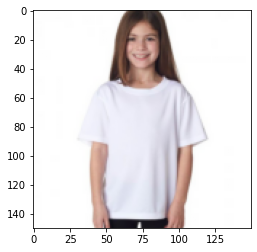

In [ ]:
#Testing image from internet
flat_data = []
url = input('Enter Url here:')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categ[y_out[0]]
print(f'Predicted Output: {y_out} ')


